# Data preparation for COVID-19

Data is downloaded daily from the Johns Hopkins University github repo. 

Three tables are used:
- [Time series Confirmed cases](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv)
- [Time series Deaths cases](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv)
- [Time series Recovered cases](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv)


Autres infos:
400 lits en rea

In [48]:
import pandas as pd 
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from urllib.request import urlopen
import json

In [49]:
!wget -O ../data/raw/time_series_19-covid-Confirmed.csv https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv
!wget -O ../data/raw/time_series_19-covid-Deaths.csv https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv
!wget -O ../data/raw/time_series_19-covid-Recovered.csv https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv

#! rm *.csv

#urls = ['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv', 
#        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv', 
#        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv']

#for url in urls:
#    filename = wget.download(url)

--2020-03-20 16:47:42--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.120.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.120.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76463 (75K) [text/plain]
Saving to: ‘../data/raw/time_series_19-covid-Confirmed.csv’

../data/raw/time_se 100%[===================>]  74.67K  --.-KB/s    in 0.02s   

2020-03-20 16:47:43 (4.57 MB/s) - ‘../data/raw/time_series_19-covid-Confirmed.csv’ saved [76463/76463]

--2020-03-20 16:47:43--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.120.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|

In [50]:
df_confirmed = pd.read_csv('../data/raw/time_series_19-covid-Confirmed.csv')
df_deaths = pd.read_csv('../data/raw/time_series_19-covid-Deaths.csv')
df_recovered = pd.read_csv('../data/raw/time_series_19-covid-Recovered.csv')

In [51]:
df_confirmed.head()

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  1/24/20  \
0            NaN       Thailand  15.0000  101.0000        2        3        5   
1            NaN          Japan  36.0000  138.0000        2        1        2   
2            NaN      Singapore   1.2833  103.8333        0        1        3   
3            NaN          Nepal  28.1667   84.2500        0        0        0   
4            NaN       Malaysia   2.5000  112.5000        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/10/20  3/11/20  3/12/20  3/13/20  \
0        7        8        8  ...       53       59       70       75   
1        2        4        4  ...      581      639      639      701   
2        3        4        5  ...      160      178      178      200   
3        1        1        1  ...        1        1        1        1   
4        3        4        4  ...      129      149      149      197   

   3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  
0       82      114      147      177      212      272  
1      773      839      825      878      889      924  
2      212      226      243      266      313      345  
3        1        1        1        1        1        1  
4      238      428      566      673      790      900  

[5 rows x 62 columns]

In [52]:
df_deaths.head()

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  1/24/20  \
0            NaN       Thailand  15.0000  101.0000        0        0        0   
1            NaN          Japan  36.0000  138.0000        0        0        0   
2            NaN      Singapore   1.2833  103.8333        0        0        0   
3            NaN          Nepal  28.1667   84.2500        0        0        0   
4            NaN       Malaysia   2.5000  112.5000        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/10/20  3/11/20  3/12/20  3/13/20  \
0        0        0        0  ...        1        1        1        1   
1        0        0        0  ...       10       15       16       19   
2        0        0        0  ...        0        0        0        0   
3        0        0        0  ...        0        0        0        0   
4        0        0        0  ...        0        0        0        0   

   3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  
0        1        1        1        1        1        1  
1       22       22       27       29       29       29  
2        0        0        0        0        0        0  
3        0        0        0        0        0        0  
4        0        0        0        2        2        2  

[5 rows x 62 columns]

In [53]:
df_recovered.head()

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  1/24/20  \
0            NaN       Thailand  15.0000  101.0000        0        0        0   
1            NaN          Japan  36.0000  138.0000        0        0        0   
2            NaN      Singapore   1.2833  103.8333        0        0        0   
3            NaN          Nepal  28.1667   84.2500        0        0        0   
4            NaN       Malaysia   2.5000  112.5000        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/10/20  3/11/20  3/12/20  3/13/20  \
0        0        2        2  ...       33       34       34       35   
1        0        1        1  ...      101      118      118      118   
2        0        0        0  ...       78       96       96       97   
3        0        0        0  ...        1        1        1        1   
4        0        0        0  ...       24       26       26       26   

   3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  
0       35       35       35       41       42       42  
1      118      118      144      144      144      150  
2      105      105      109      114      114      114  
3        1        1        1        1        1        1  
4       35       42       42       49       60       75  

[5 rows x 62 columns]

In [54]:
df_confirmed['Country/Region'].value_counts()

US           247
China         33
Canada        11
France         9
Australia      9
            ... 
Cuba           1
Romania        1
Namibia        1
Egypt          1
Eswatini       1
Name: Country/Region, Length: 155, dtype: int64

In [55]:
df_confirmed['Location'] = df_confirmed['Province/State'].astype(str) + '__' + df_confirmed['Country/Region'].astype(str)

In [56]:
df_confirmed['Location'] = df_confirmed['Location'].apply(lambda x: x.replace('nan__', ''))

In [57]:
df_confirmed = df_confirmed.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
df_confirmed.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0        2        3        5        7        8        8       14       14   
1        2        1        2        2        4        4        7        7   
2        0        1        3        3        4        5        7        7   
3        0        0        0        1        1        1        1        1   
4        0        0        0        3        4        4        4        7   

   1/30/20  1/31/20  ...  3/11/20  3/12/20  3/13/20  3/14/20  3/15/20  \
0       14       19  ...       59       70       75       82      114   
1       11       15  ...      639      639      701      773      839   
2       10       13  ...      178      178      200      212      226   
3        1        1  ...        1        1        1        1        1   
4        8        8  ...      149      149      197      238      428   

   3/16/20  3/17/20  3/18/20  3/19/20   Location  
0      147      177      212      272   Thailand  
1      825      878      889      924      Japan  
2      243      266      313      345  Singapore  
3        1        1        1        1      Nepal  
4      566      673      790      900   Malaysia  

[5 rows x 59 columns]

In [58]:
df_confirmed_ts = pd.pivot_table(df_confirmed, columns=['Location'])

In [59]:
df_confirmed_ts.index = pd.to_datetime(df_confirmed_ts.index)

In [60]:
df_confirmed_ts.head()

Location    Adams, IN__US  Afghanistan  Alabama__US  Alachua, FL__US  \
2020-01-22              0            0            0                0   
2020-01-23              0            0            0                0   
2020-01-24              0            0            0                0   
2020-01-25              0            0            0                0   
2020-01-26              0            0            0                0   

Location    Alameda County, CA__US  Alaska__US  Albania  Alberta__Canada  \
2020-01-22                       0           0        0                0   
2020-01-23                       0           0        0                0   
2020-01-24                       0           0        0                0   
2020-01-25                       0           0        0                0   
2020-01-26                       0           0        0                0   

Location    Algeria  Andorra  ...  Whatcom, WA__US  Williamson County, TN__US  \
2020-01-22        0        0  ...                0                          0   
2020-01-23        0        0  ...                0                          0   
2020-01-24        0        0  ...                0                          0   
2020-01-25        0        0  ...                0                          0   
2020-01-26        0        0  ...                0                          0   

Location    Wisconsin__US  Worcester, MA__US  Wyoming__US  Xinjiang__China  \
2020-01-22              0                  0            0                0   
2020-01-23              0                  0            0                2   
2020-01-24              0                  0            0                2   
2020-01-25              0                  0            0                3   
2020-01-26              0                  0            0                4   

Location    Yolo County, CA__US  YunChina  Zambia  Zhejiang__China  
2020-01-22                    0         1       0               10  
2020-01-23                    0         2       0               27  
2020-01-24                    0         5       0               43  
2020-01-25                    0        11       0               62  
2020-01-26                    0        16       0              104  

[5 rows x 468 columns]

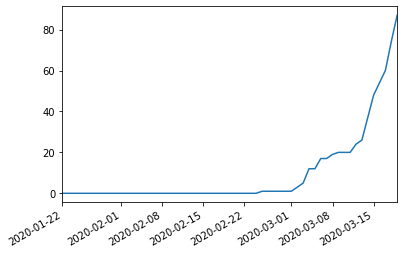

In [61]:
df_confirmed_ts['Algeria'].plot()

In [62]:
del df_confirmed_ts.index.name

In [63]:
df_confirmed_ts

Location    Adams, IN__US  Afghanistan  Alabama__US  Alachua, FL__US  \
2020-01-22              0            0            0                0   
2020-01-23              0            0            0                0   
2020-01-24              0            0            0                0   
2020-01-25              0            0            0                0   
2020-01-26              0            0            0                0   
2020-01-27              0            0            0                0   
2020-01-28              0            0            0                0   
2020-01-29              0            0            0                0   
2020-01-30              0            0            0                0   
2020-01-31              0            0            0                0   
2020-02-01              0            0            0                0   
2020-02-10              0            0            0                0   
2020-02-11              0            0            0                0   
2020-02-12              0            0            0                0   
2020-02-13              0            0            0                0   
2020-02-14              0            0            0                0   
2020-02-15              0            0            0                0   
2020-02-16              0            0            0                0   
2020-02-17              0            0            0                0   
2020-02-18              0            0            0                0   
2020-02-19              0            0            0                0   
2020-02-02              0            0            0                0   
2020-02-20              0            0            0                0   
2020-02-21              0            0            0                0   
2020-02-22              0            0            0                0   
2020-02-23              0            0            0                0   
2020-02-24              0            1            0                0   
2020-02-25              0            1            0                0   
2020-02-26              0            1            0                0   
2020-02-27              0            1            0                0   
2020-02-28              0            1            0                0   
2020-02-29              0            1            0                0   
2020-02-03              0            0            0                0   
2020-02-04              0            0            0                0   
2020-02-05              0            0            0                0   
2020-02-06              0            0            0                0   
2020-02-07              0            0            0                0   
2020-02-08              0            0            0                0   
2020-02-09              0            0            0                0   
2020-03-01              0            1            0                0   
2020-03-10              0            5            0                0   
2020-03-11              0            7            0                0   
2020-03-12              0            7            0                0   
2020-03-13              0            7            5                0   
2020-03-14              0           11            6                0   
2020-03-15              0           16           12                0   
2020-03-16              0           21           29                0   
2020-03-17              0           22           39                0   
2020-03-18              0           22           46                0   
2020-03-19              0           22           78                0   
2020-03-02              0            1            0                0   
2020-03-03              0            1            0                0   
2020-03-04              0            1            0                0   
2020-03-05              0            1            0                0   
2020-03-06              0            1  

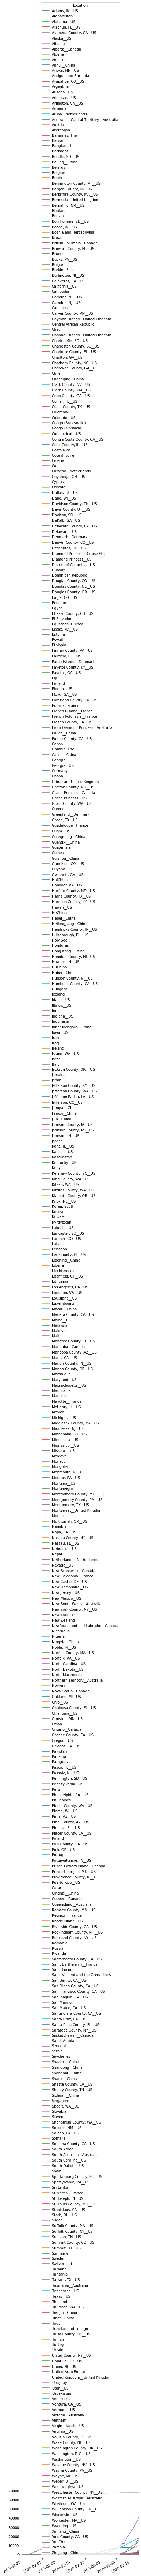

In [64]:
df_confirmed_ts.plot()

In [65]:
df_confirmed_ts.to_csv('../data/interim/time_series_covid-19-Confirmed.csv', index=True)

## Let's do the same preprocess for deaths and recovered

In [66]:
df_deaths['Location'] = df_deaths['Province/State'].astype(str) + '__' + df_deaths['Country/Region'].astype(str)
df_recovered['Location'] = df_recovered['Province/State'].astype(str) + '__' + df_recovered['Country/Region'].astype(str)

In [67]:
df_deaths['Location'] = df_deaths['Location'].apply(lambda x: x.replace('nan__', ''))
df_recovered['Location'] = df_recovered['Location'].apply(lambda x: x.replace('nan__', ''))

In [68]:
df_deaths = df_deaths.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
df_deaths.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   1/30/20  1/31/20  ...  3/11/20  3/12/20  3/13/20  3/14/20  3/15/20  \
0        0        0  ...        1        1        1        1        1   
1        0        0  ...       15       16       19       22       22   
2        0        0  ...        0        0        0        0        0   
3        0        0  ...        0        0        0        0        0   
4        0        0  ...        0        0        0        0        0   

   3/16/20  3/17/20  3/18/20  3/19/20   Location  
0        1        1        1        1   Thailand  
1       27       29       29       29      Japan  
2        0        0        0        0  Singapore  
3        0        0        0        0      Nepal  
4        0        2        2        2   Malaysia  

[5 rows x 59 columns]

In [69]:
df_recovered = df_recovered.drop(columns=['Province/State', 'Country/Region', 'Lat', 'Long'])
df_recovered.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0        0        0        0        0        2        2        5        5   
1        0        0        0        0        1        1        1        1   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   1/30/20  1/31/20  ...  3/11/20  3/12/20  3/13/20  3/14/20  3/15/20  \
0        5        5  ...       34       34       35       35       35   
1        1        1  ...      118      118      118      118      118   
2        0        0  ...       96       96       97      105      105   
3        0        0  ...        1        1        1        1        1   
4        0        0  ...       26       26       26       35       42   

   3/16/20  3/17/20  3/18/20  3/19/20   Location  
0       35       41       42       42   Thailand  
1      144      144      144      150      Japan  
2      109      114      114      114  Singapore  
3        1        1        1        1      Nepal  
4       42       49       60       75   Malaysia  

[5 rows x 59 columns]

In [70]:
df_deaths_ts = pd.pivot_table(df_deaths, columns=['Location'])
df_deaths_ts.index = pd.to_datetime(df_deaths_ts.index)

df_recovered_ts = pd.pivot_table(df_recovered, columns=['Location'])
df_recovered_ts.index = pd.to_datetime(df_recovered_ts.index)

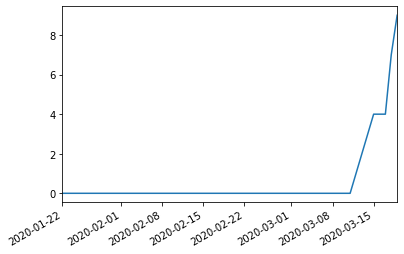

In [71]:
df_deaths_ts['Algeria'].plot()

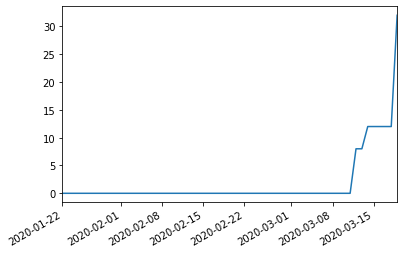

In [72]:
df_recovered_ts['Algeria'].plot()

In [73]:
df_deaths_ts.to_csv('../data/interim/time_series_covid-19-Deaths.csv', index=True)
df_recovered_ts.to_csv('../data/interim/time_series_covid-19-Recovered.csv', index=True)

In [74]:
df_conf_melt = df_confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                 var_name='Date', value_name='Confirmed')

KeyError: "The following 'id_vars' are not present in the DataFrame: ['Country/Region', 'Lat', 'Long', 'Province/State']"

In [ ]:
df_death_melt = df_deaths.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                 var_name='Date', value_name='Deaths')

In [ ]:
df_reco_melt = df_recovered.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
                 var_name='Date', value_name='Recovered')

In [ ]:
merged_cd = df_conf_melt.merge(df_death_melt, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])

In [ ]:
df_complete = merged_cd.merge(df_reco_melt, on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date'])

In [ ]:
df_complete.head()

In [ ]:
df_complete.to_csv('../data/interim/time_series_covid-19-complete.csv', index=False)

In [ ]:
df_complete = merged_all

df_grouped_country = df_complete.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum()

In [34]:
df_grouped_country.sort_values('Confirmed', ascending=False).style.background_gradient(cmap='Reds')

In [37]:
tm = df_complete.melt(id_vars="Date", value_vars=['Confirmed', 'Deaths', 'Recovered'])
fig = px.treemap(tm, path=["variable"], values="value", height=400, width=600)
fig.show()

## External data

In [1]:
import json

In [2]:
with open('../data/external/algeria.json') as f:
    algeria_map = json.load(f)

In [9]:
algeria_map['features'][3]['properties']

{'name': 'Illizi', 'id': 33}

## Geo Data

In [5]:
!pip install folium

     |████████████████████████████████| 92kB 3.8MB/s 


In [6]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/bidHimArm/covid-19_algeria/master/data/external/algeria.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/bidHimArm/covid-19_algeria/master/data/external/cases_summary_algeria.csv", 
                 dtype={"id": str})

import plotly.express as px

fig = px.choropleth_mapbox(df, geojson=counties, locations="id", color='num_cases',
                           color_continuous_scale="Viridis",
                           range_color=(0, 6),
                           mapbox_style="carto-positron",
                           zoom=5, center = {"lat": 35, "lon": 2.8323},
                           opacity=0.5,
                           labels={'num_cases':'number of confirmed COVID-19 cases'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

{'type': 'Feature', 'id': '37', 'properties': {'name': 'Tindouf', 'num_wilaya': '37'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-5.559082, 29.496987], [-5.229492, 29.382175], [-4.724121, 29.343875], [-4.438476, 28.786918], [-4.196777, 28.22697], [-3.955078, 27.897349], [-3.867187, 27.586197], [-3.581542, 27.293689], [-3.054199, 27.254629], [-3.076171, 26.980828], [-3.383789, 26.784847], [-3.735351, 26.74561], [-4.020996, 26.332806], [-4.086914, 25.997549], [-4.855957, 25.977798], [-5.031738, 25.780107], [-5.625, 25.502784], [-8.635253, 27.293689], [-8.723144, 28.70986], [-7.624511, 29.305561], [-7.185058, 29.477861], [-6.657714, 29.51611], [-5.822753, 29.573457], [-5.559082, 29.496987]]]}}


In [ ]:
fig = px.treemap(mers_cntry, path=["Country"], values="Confirmed", title='Confirmed Cases',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.show()